In [1]:
import numpy as np
import matplotlib.pyplot as plt
from European_Option import European_Option
plt.style.use('dark_background')

In [7]:
# Initialize Axis Variables

T = np.linspace(.5,10,2000)
Stock_Prices = np.linspace(20,140,2000)

Option = European_Option(Stock_Prices,105,0,.2,.5,1,sgm=.3)

delta=Option.Delta()
gamma=Option.Gamma()

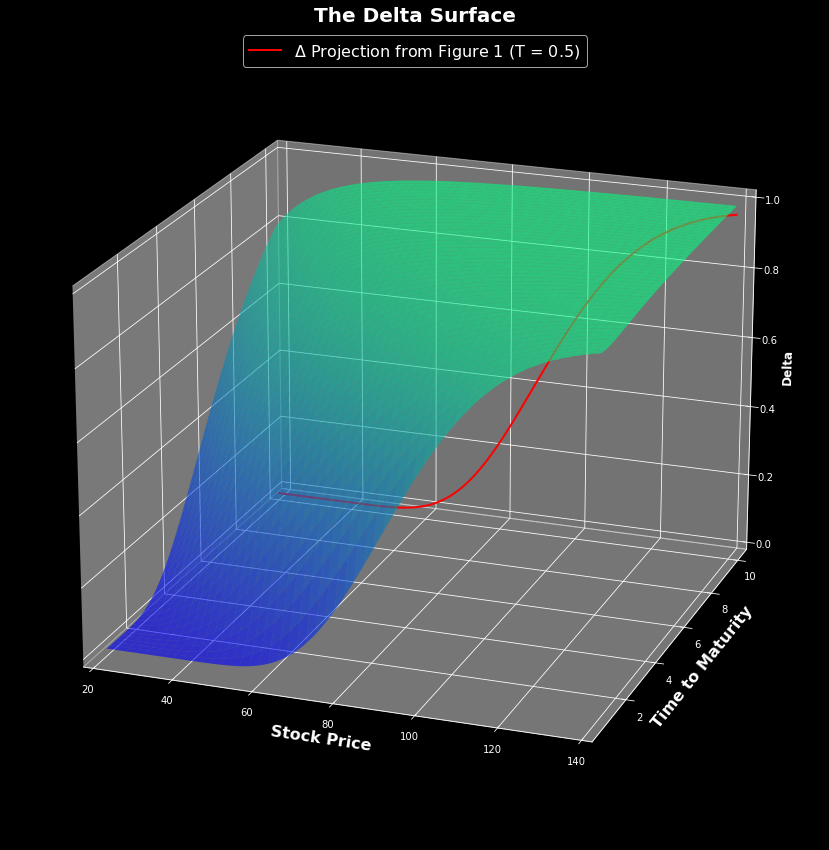

In [8]:
# Define Variables for Plotting the Surface
X, Y = np.meshgrid(Stock_Prices, T)
Z=European_Option(X,105,0,.2,Y,1,sgm=.3).Delta()

#Plot
plt.figure(figsize=(20,15))
ax = plt.axes(projection ='3d')
ax.set_title('The Delta Surface',fontweight='bold',fontsize=20)
ax.view_init(20,290)
ax.set_xlim(20,140)
ax.set_zlim(0,1)
ax.set_ylabel('Time to Maturity',fontsize=16,fontweight='bold')
ax.set_xlabel('Stock Price', fontsize=16,fontweight='bold')
ax.set_zlabel('Delta',fontsize=12,fontweight='bold')

ax.plot(Stock_Prices, delta, zs=10, zdir='y', linewidth='2',
        label='$\Delta$ Projection from Figure 1 (T = 0.5)',color='red')
ax.plot_surface(X, Y, Z, cmap='winter',alpha=.6)
ax.legend(loc='upper center',fontsize=16)

plt.show()

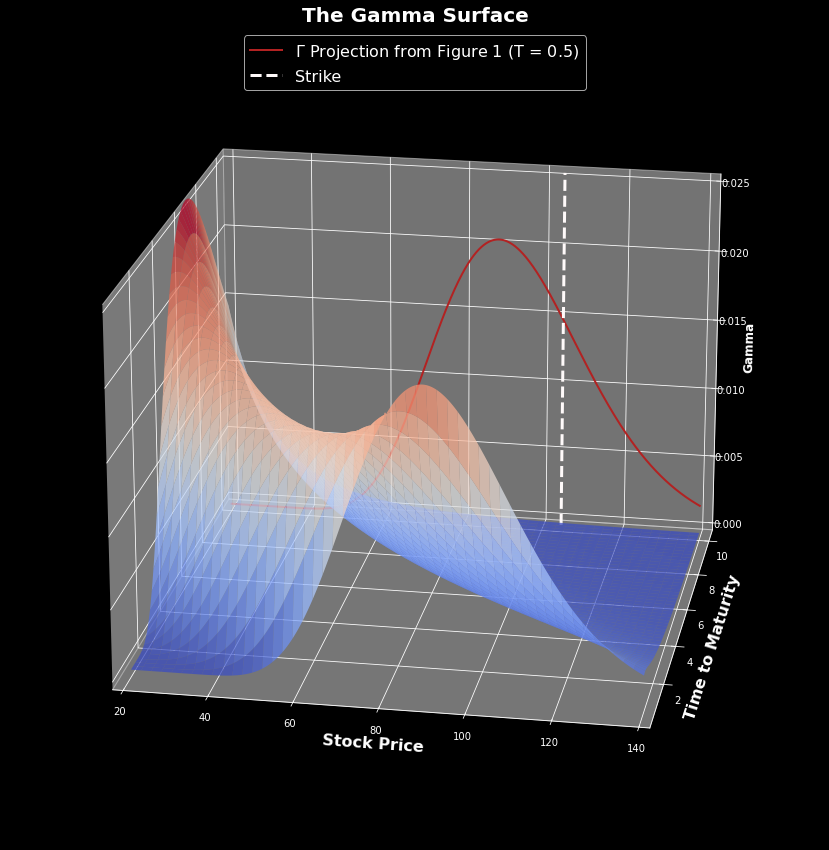

In [9]:
gs = np.linspace(gamma.min(),gamma.max()+.005)
S = np.ones(len(gs))*105

# Define Variables for Plotting the Surface
X, Y = np.meshgrid(Stock_Prices, T)
Z = European_Option(X,105,0,.2,Y,1,sgm=.3).Gamma()

# Plot
plt.figure(figsize=(20,15))
ax = plt.axes(projection ='3d')
ax.set_title('The Gamma Surface',fontweight='bold',fontsize=20)
ax.view_init(20,280)
ax.set_xlim(20,140)
ax.set_zlim(0,.025)
ax.set_ylabel('Time to Maturity',fontsize=16,fontweight='bold')
ax.set_xlabel('Stock Price', fontsize=16,fontweight='bold')
ax.set_zlabel('Gamma',fontsize=12,fontweight='bold')

ax.plot(Stock_Prices, gamma, zs=10, zdir='y', linewidth='2',
        label='$\Gamma$ Projection from Figure 1 (T = 0.5)',color='firebrick')
ax.plot(S,gs,zs=10,zdir='y',
        label='Strike',color='snow',linewidth=3,linestyle='--')
ax.plot_surface(X, Y, Z, cmap='coolwarm',alpha=.75)
#ax.scatter(64,1,.017, linewidth=8, color='black', label='Saddle Point')
ax.legend(loc='upper center',fontsize=16)

plt.show()